In [264]:
import pandas as pd
import numpy as np
import sklearn
import datetime
import matplotlib.pyplot as plt
from numpy.random import normal, uniform
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression
import scipy.stats as st
import scipy.integrate as integrate

# Часть I: О теореме Байеса

## 1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови! 
## Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Прокурор оценил не то событие.
Если обозначить за А - группу крови, а за B - виновность человека, то прокурор оценил: $$ p(A) $$ - то, что у случайно выбранного человека будет отличная от редкой группа крови с вероятностью 0,99 (априорная вероятность).
Вместо этого ему нужно было оценить: $$p(B \mid A) $$ - виновность человека при условии редкой группы крови. Можно расписать через формулу Байеса:

$$p(B \mid A) \propto p(A)p(A \mid B) $$

## 2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить.

Тут адвокат тоже не прав, оценив не то событие. Если обозначить за А - группа крови, а B - убийца, то адвокат оценил событие: $$ p(A) $$ - то, что если выбрать случайного человека в городе, то у него будет редкая группа крови с вероятостью 0.01. На самом деле адвокату нужно оценить сколько из людей с редкой группой крови являются убийцами:
$$p(B \mid A) $$
Это можно опять посчитать по формуле Байеса как:
$$p(B \mid A) \propto p(A)p(A \mid B) $$

## 3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.
Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).
Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


C:\Users\MishaYuliaAlina\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\MishaYuliaAlina\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


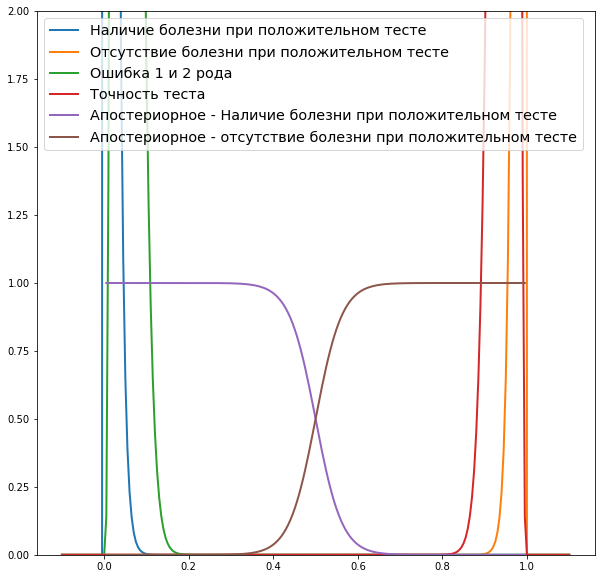

In [417]:
xs = np.arange(-0.1, 1.1, 0.005)
prior_params = (1, 99)
prior_params_inv = (99, 1)
test_params = (95, 5)
test_params_inv = (5, 95)


pri = st.beta(prior_params[0], prior_params[1]).pdf
ys_prior = [ pri(x)  for x in xs ]

pri_inv = st.beta(prior_params_inv[0], prior_params_inv[1]).pdf
ys_prior_inv = [ pri_inv(x)  for x in xs ]

lk = st.beta(test_params[0], test_params[1]).pdf
ys_like = [ lk(x)  for x in xs ]

lk_inv = st.beta(test_params_inv[0], test_params_inv[1]).pdf
ys_like_inv = [ lk_inv(x)  for x in xs ]

post = lambda x : (lk(x) * pri(x)) / (lk(x) * pri(x) + lk_inv(x) * pri_inv(x))
ys_post = [ post(x)  for x in xs ]

post_inv = lambda x : (lk_inv(x) * pri_inv(x)) / (lk(x) * pri(x) + lk_inv(x) * pri_inv(x))
ys_post_inv = [ post_inv(x) for x in xs ]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(xs, ys_prior, linewidth=2, label="Наличие болезни при положительном тесте")
ax.plot(xs, ys_prior_inv, linewidth=2, label="Отсутствие болезни при положительном тесте")
ax.plot(xs, ys_like_inv, linewidth=2, label="Ошибка 1 и 2 рода")
ax.plot(xs, ys_like, linewidth=2, label="Точность теста")
ax.plot(xs, ys_post, linewidth=2, label="Апостериорное - Наличие болезни при положительном тесте ")
ax.plot(xs, ys_post_inv, linewidth=2, label="Апостериорное - отсутствие болезни при положительном тесте")
ax.set_ylim((-.0, 2))
ax.legend(loc="upper left", fontsize='x-large')
plt.show()

Врачам имеет смысл сосредоточиться на уменьшении ошибок первого и второго рода, тогда распределение будет выглядеть следующим образом, например при оишбке теста в 2%:

C:\Users\MishaYuliaAlina\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\MishaYuliaAlina\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


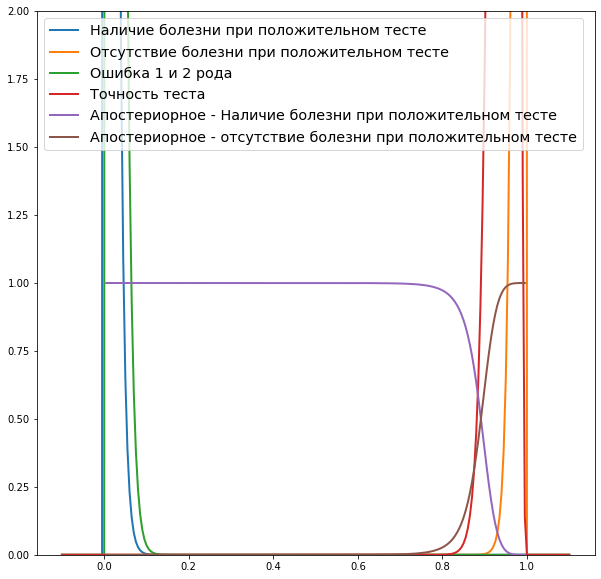

In [419]:
xs = np.arange(-0.1, 1.1, 0.005)
prior_params = (1, 99)
prior_params_inv = (99, 1)
test_params = (95, 5)
test_params_inv = (2, 98)


pri = st.beta(prior_params[0], prior_params[1]).pdf
ys_prior = [ pri(x)  for x in xs ]

pri_inv = st.beta(prior_params_inv[0], prior_params_inv[1]).pdf
ys_prior_inv = [ pri_inv(x)  for x in xs ]

lk = st.beta(test_params[0], test_params[1]).pdf
ys_like = [ lk(x)  for x in xs ]

lk_inv = st.beta(test_params_inv[0], test_params_inv[1]).pdf
ys_like_inv = [ lk_inv(x)  for x in xs ]

post = lambda x : (lk(x) * pri(x)) / (lk(x) * pri(x) + lk_inv(x) * pri_inv(x))
ys_post = [ post(x)  for x in xs ]

post_inv = lambda x : (lk_inv(x) * pri_inv(x)) / (lk(x) * pri(x) + lk_inv(x) * pri_inv(x))
ys_post_inv = [ post_inv(x) for x in xs ]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(xs, ys_prior, linewidth=2, label="Наличие болезни при положительном тесте")
ax.plot(xs, ys_prior_inv, linewidth=2, label="Отсутствие болезни при положительном тесте")
ax.plot(xs, ys_like_inv, linewidth=2, label="Ошибка 1 и 2 рода")
ax.plot(xs, ys_like, linewidth=2, label="Точность теста")
ax.plot(xs, ys_post, linewidth=2, label="Апостериорное - Наличие болезни при положительном тесте ")
ax.plot(xs, ys_post_inv, linewidth=2, label="Апостериорное - отсутствие болезни при положительном тесте")
ax.set_ylim((-.0, 2))
ax.legend(loc="upper left", fontsize='x-large')
plt.show()

# Часть II: О линейной регресии

Открываем наши данные по коронавирусу

In [362]:
full_data = pd.read_csv('owid-covid-data.csv')

Для того, чтобы удобнее было работать с датами переведем их в timestamp. В первые 50 дней с 3 марта по 21 апреля 2020 года присутствует только 45 строк, у статистов были выходные. Так что сдвигаем правую границу еще на 5 дней до 26 апреля.

In [363]:
start_date = datetime.datetime(2020, 3, 3, 0, 0, 0).timestamp()
end_date = datetime.datetime(2020, 4, 26, 0, 0, 0).timestamp() 

In [364]:
all_timestamps = list()
for i in range(len(full_data)):
    all_timestamps.append(datetime.datetime.timestamp(pd.to_datetime(full_data.iloc[i].date)))

Вклеиваем колонку с таймстемпами и все нули в new_cases сразу заменяем на 1 для удобства. Далее фильтруем по региону Россию и размечаем выборки для обучения и тестирования

In [365]:
ans = pd.DataFrame(np.c_[all_timestamps])
ans.columns = ['timestamp']
result = pd.concat([full_data, ans], axis=1)


In [366]:
result[result.new_cases == 0] = 1

In [367]:
rus_data = result[result.location == "Russia"]

In [368]:
rus_data_train = rus_data[(rus_data.timestamp >= start_date) & (rus_data.timestamp <= end_date)]
rus_data_test = rus_data[rus_data.timestamp > end_date]

## 2a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

По х просто задаем диапазон первых 50 дней для обучения и оставшихся для теста. Прологарифмируем по y 

In [369]:
x_day = np.arange(len(rus_data_train.total_cases))
x_day_test = np.arange(len(rus_data_train.total_cases), len(rus_data_test.total_cases) + len(rus_data_train.total_cases))

In [370]:
X_train = pd.DataFrame(np.c_[x_day])
y_train = pd.DataFrame(np.c_[rus_data_train.total_cases])
y_train.columns = ['total_cases']

X_test = pd.DataFrame(np.c_[x_day_test])
y_test = pd.DataFrame(np.c_[rus_data_test.total_cases])
y_test.columns = ['total_cases']

y_train = np.log(y_train)
y_test = np.log(y_test)


Берем обычную линейную регрессию, обучаем модель и строим графики

In [371]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [372]:
y_predict = lr.predict(pd.DataFrame(np.c_[x_day]))
y_predict_test = lr.predict(pd.DataFrame(np.c_[x_day_test]))

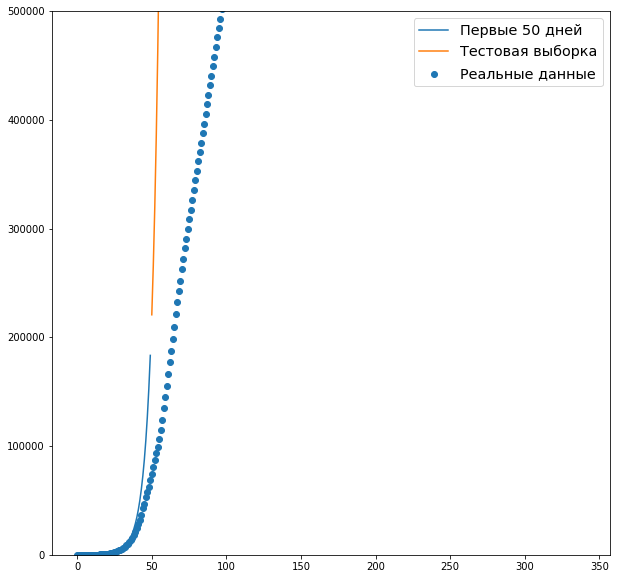

In [373]:
fig = plt.figure(figsize=(10, 10))

plt.ylim(top=.5e6)
plt.scatter(np.arange(len(rus_data.total_cases)), rus_data.total_cases, label="Реальные данные")
plt.plot(x_day, pd.DataFrame(np.c_[np.exp(y_predict)]), label="Первые 50 дней")
plt.plot(x_day_test, pd.DataFrame(np.c_[np.exp(y_predict_test)]), label="Тестовая выборка")
plt.legend(fontsize='x-large')

Посмотрим на коэффициенты - потом хочется сравнить их с результатами полученными из Байесовской регрессии. Често говоря, результаты поражают воображение, так как если убрать на графике ограничение сверху для y, то значения устремляются к 21 степени. Кстати, тут еще необходимо не забыть взять от предсказанных значений экспоненту, так как до этого y мы логарифмировали.

In [374]:
print('w_0:', *lr.intercept_)
print('w_1:', *lr.coef_)

w_0: 3.0414384368831158
w_1: [0.18526802]


## 2б. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

Ну тут явно задача нас подводит к параграфу 3.3 Байесовская линейная регрессия из книги К. Бишопа "Распознавание образов и машинное обучение". Берем формулы из этого параграфа и просто реализуем класс, который нам посчитает апостериорное распределение весов нашей модели.

In [375]:
class Bayes:
    def __init__(self, mean, covariance, noise_sigma, w_size):
        self.prior = multivariate_normal(mean=mean, cov=covariance)
        self.posterior = self.prior
        
        self.mean = mean.reshape(-1, 1)
        self.covariance = covariance
        self.noise_sigma = noise_sigma
        self.w_size = w_size

    def update_bayes(self, x_train, y_train):
        y_transpose = y_train.reshape(-1, 1)
        
        if self.w_size > 2:
            x_transpose = np.ones((len(x_train[0]), self.w_size))
            for i in range(1, self.w_size):
                x_transpose[:, i] = x_train[i - 1]
        else:
            x_transpose = np.ones((len(x_train), self.w_size))
            x_transpose[:, 1] = x_train
        
        self.covariance_next = np.linalg.inv(np.linalg.inv(self.covariance) + self.noise_sigma*x_transpose.T.dot(x_transpose))

        self.mean_next = self.covariance_next.dot(np.linalg.inv(self.covariance).dot(self.mean) + self.noise_sigma*x_transpose.T.dot(y_transpose))
        
        self.posterior = multivariate_normal(mean=self.mean_next.flatten(), cov=self.covariance_next)

Устанавливаем параметры alpha = 3., beta = 1 / noise_sigma ** 2, где noise_sigma = 0.2 (прямо как в Бишопе :)).

In [376]:
WEIGHT_SIZE = 2

alpha = 3.
mean = np.zeros(WEIGHT_SIZE)
cov = 1/alpha*np.identity(WEIGHT_SIZE)

noise_sigma = 0.2
beta = 1 / noise_sigma ** 2

b_model = Bayes(mean, cov, beta, WEIGHT_SIZE)



In [377]:
X = x_day
y = np.log(np.array(rus_data_train.total_cases))

Посмотрим на наше апостериорное распределение. Крестик - веса из линейной регрессии, обученной в 2а.

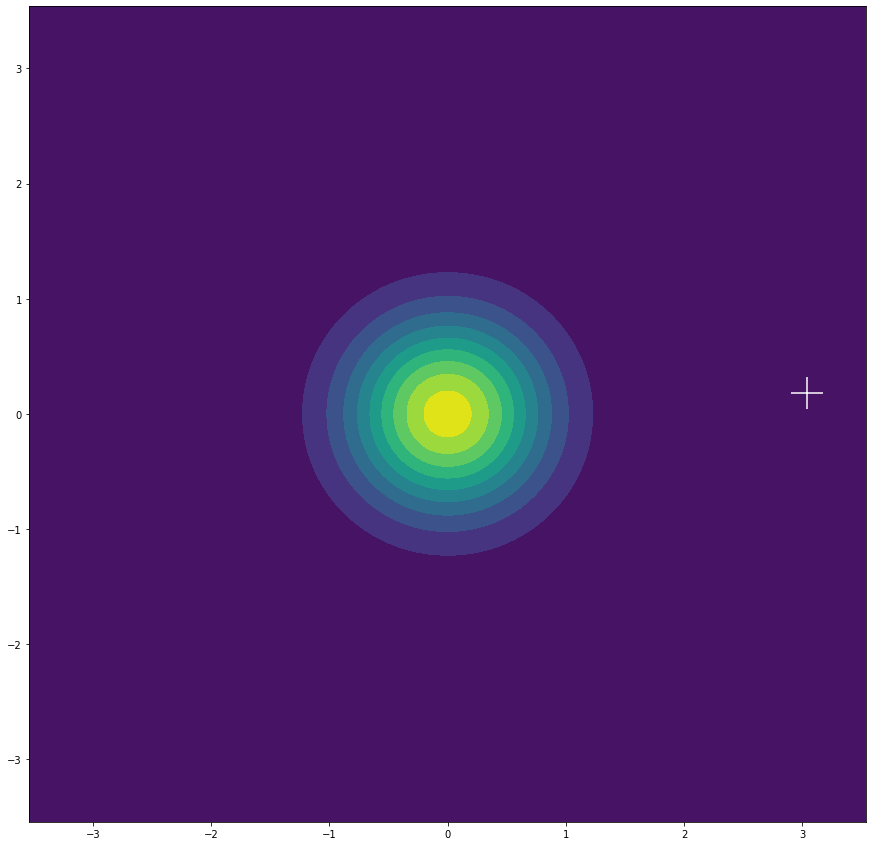

In [378]:
x_lim = lr.intercept_ + .5
y_lim = lr.intercept_ + .5
w_x, w_y = np.mgrid[-x_lim:x_lim:.01, -y_lim:y_lim:.01]
pos = np.empty(w_x.shape + (WEIGHT_SIZE,))
pos[:, :, 0] = w_x
pos[:, :, 1] = w_y

fig = plt.figure(figsize=(15, 15))
plt.contourf(w_x, w_y, b_model.posterior.pdf(pos), 10)
plt.scatter(lr.intercept_, lr.coef_, marker='+', c='white', s=1000)

Посэмплируем наши экспоненты и посмотрим на графики - пока явно не очень хорошо получается

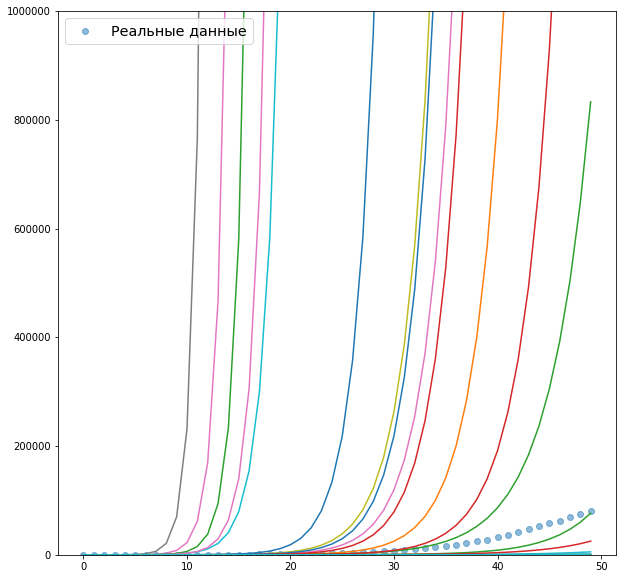

In [379]:
fig = plt.figure(figsize=(10, 10))
plt.ylim(top=1e6)
plt.scatter(X, np.exp(y), alpha=0.5, label="Реальные данные")

weights = b_model.posterior.rvs(50)

for weight in weights: 
    plt.plot(X, np.exp(weight[0] + weight[1] * X))
    
plt.legend(fontsize='x-large')    

Посмотрим, что изменится, если дать модели пару точек из нашей обучающей выборки. Сразу замечаем, что распределение уже не такое широкое и сместилось к нашим весам из 2а.

In [380]:
b_model.update_bayes(X[0:2], y[0:2])

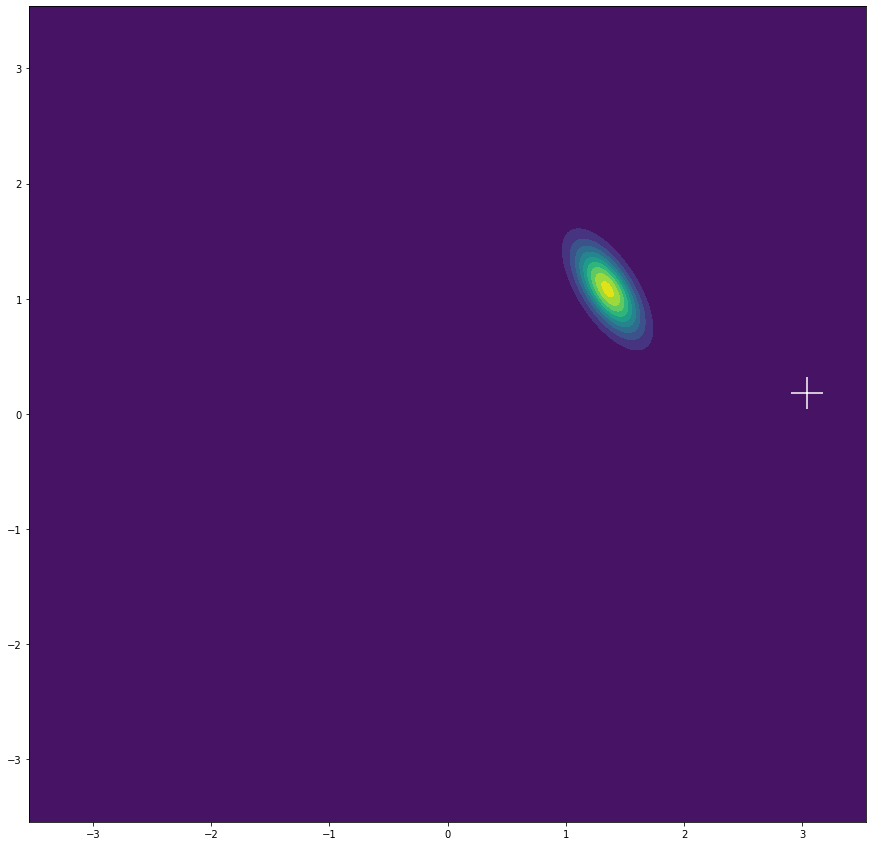

In [381]:
fig = plt.figure(figsize=(15, 15))
plt.contourf(w_x, w_y, b_model.posterior.pdf(pos), 10)
plt.scatter(lr.intercept_, lr.coef_, marker='+', c='white', s=1000)

Графики тоже пошли покучнее - мы явно на правильном пути!

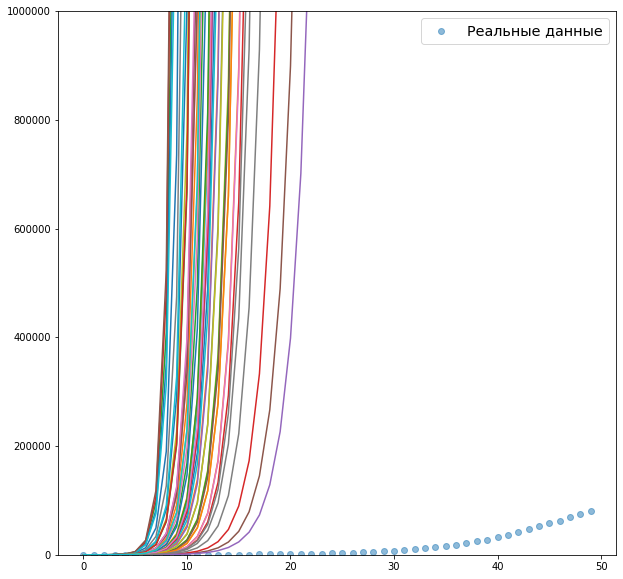

In [382]:
fig = plt.figure(figsize=(10, 10))
plt.ylim(top=1e6)
plt.scatter(X, np.exp(y), alpha=0.5, label="Реальные данные")

weights = b_model.posterior.rvs(50)

for weight in weights: 
    plt.plot(X, np.exp(weight[0] + weight[1] * X))
    
plt.legend(fontsize='x-large')      

In [383]:
b_model.update_bayes(X, y)

Отправляем в модель всю обучающую выборку, распределение теперь в окрестности нашей модели из 2а. Давайте посмотрим на графики

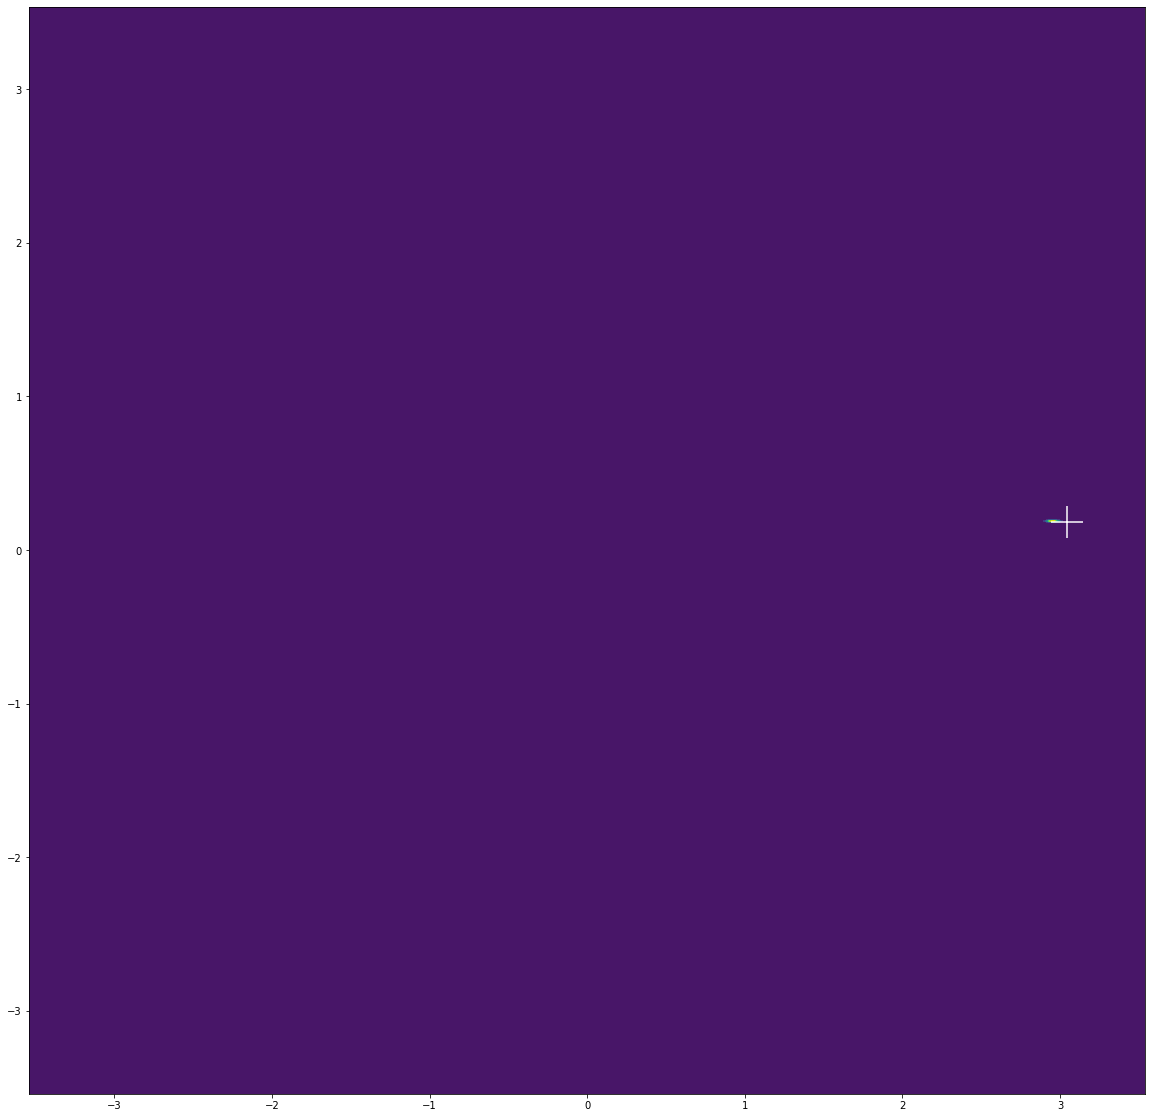

In [384]:
fig = plt.figure(figsize=(20, 20))
plt.contourf(w_x, w_y, b_model.posterior.pdf(pos), 10)
plt.scatter(lr.intercept_, lr.coef_, marker='+', c='white', s=1000)

## 2c.	Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования)

In [385]:
x_day_full = np.arange(len(rus_data.total_cases))
y_full = rus_data.total_cases

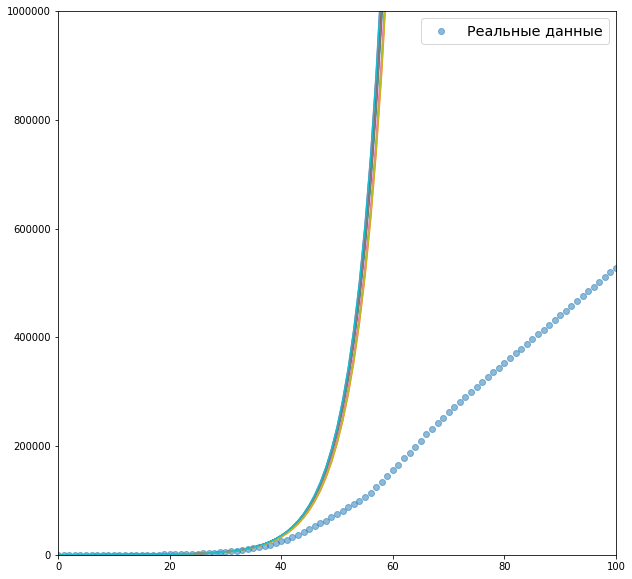

In [386]:
fig = plt.figure(figsize=(10, 10))
plt.ylim(top=1e6)
plt.xlim(right=100)
plt.scatter(x_day_full, y_full, alpha=0.5, label="Реальные данные")

weights = b_model.posterior.rvs(10)
res = list()

for weight in weights: 
    plt.plot(x_day_full, np.exp(weight[0] + weight[1] * x_day_full))
    res.append(np.exp(weight[0] + weight[1] * x_day_full))
    
plt.legend(fontsize='x-large')    

В целом результат повторяет 2а, количество заболеваний стремительно увеличивается. Но теперь мы знаем параметры нашей модели из которой брали веса для предсказания.

In [387]:
print('Мат ожидание: ', *b_model.mean)
print('Обратная ковариационная матрица: ', *b_model.covariance_next)

Мат ожидание:  [0.] [0.]
Обратная ковариационная матрица:  [ 3.07718391e-03 -9.32477205e-05] [-9.32477205e-05  3.81516388e-06]


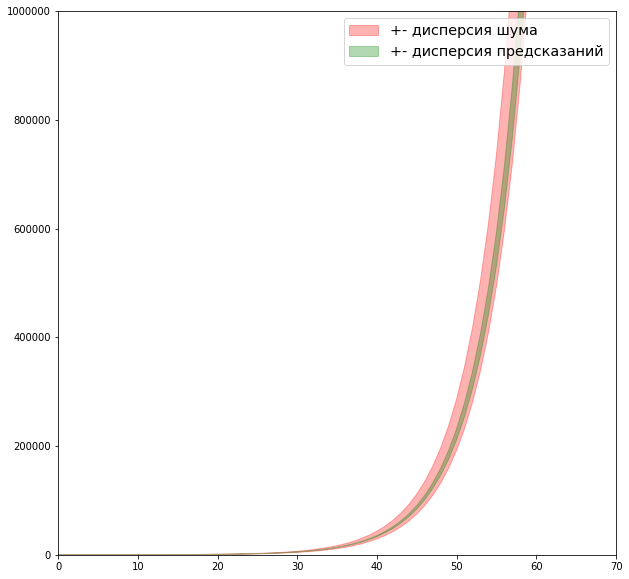

In [388]:
fig = plt.figure(figsize=(10, 10))
plt.ylim(top=1e6)
plt.xlim(right=70)
plt.fill_between(x_day_full, np.exp(weight[1]*x_day_full + weight[0] - .2),  np.exp(weight[1]*x_day_full + weight[0] + .2), color='red', alpha=.3, label="+- дисперсия шума")
plt.fill_between(x_day_full, np.mean(res, axis=0) - np.std(res, axis=0), np.mean(res, axis=0) + np.std(res, axis=0), color='green', alpha=.3, label="+- дисперсия предсказаний")
plt.legend(fontsize='x-large')   

## 3а. Предложите способ обучать параметры сигмоидальной функции при помощи линейной регрессии.

Для этой задачи берем полином второй степени, по y возьмем теперь new_cases вместо total_cases и будем накапливать сумму по предсказаниям модели. Повторяем fit, predict для линейной регрессии и опять построим графики.

In [389]:
X_train = pd.DataFrame(np.c_[x_day, x_day ** 2])

y_train = pd.DataFrame(np.c_[rus_data_train.new_cases])

y_train.columns = ['new_cases']

X_test = pd.DataFrame(np.c_[x_day_test, x_day_test ** 2])

y_test = pd.DataFrame(np.c_[rus_data_test.new_cases])

y_test.columns = ['new_cases']

y_train = np.log(y_train)
y_test = np.log(y_test)

In [390]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [391]:
y_predict = lr.predict(X_train)
y_predict_test = lr.predict(X_test)

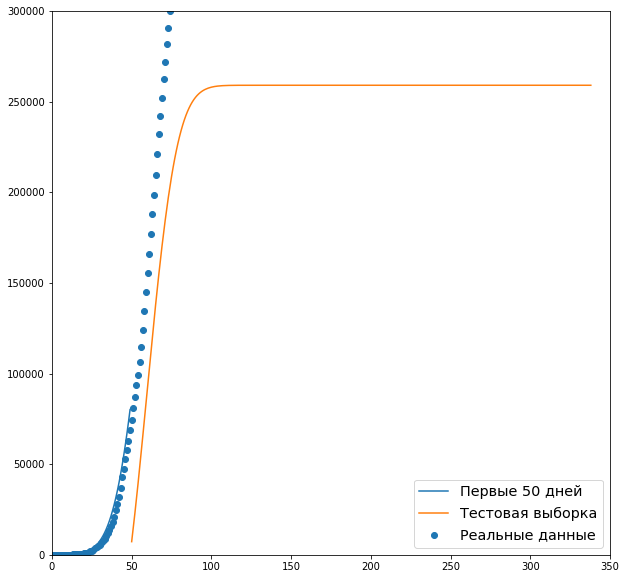

In [392]:
fig = plt.figure(figsize=(10, 10))

plt.xlim(right=350)
plt.ylim(top=3e5)
plt.scatter(np.arange(len(rus_data.new_cases)), np.cumsum(rus_data.new_cases), label="Реальные данные")
plt.plot(x_day, np.cumsum(np.exp(y_predict)), label="Первые 50 дней")
plt.plot(x_day_test, np.cumsum(np.exp(y_predict_test)), label="Тестовая выборка")
plt.legend(fontsize='x-large')

 Как видим, теперь результатся в первые 50 дней очень похожи, но дальше у графика тестовой выборки происходит насыщение, а вот реальные данные устремляются вверх. Забираем опять веса этой модели и идем снова обучать Байесовскую линейную регрессию.

In [393]:
print('w_0:', *lr.intercept_)
print('w_1:', lr.coef_[0][0])
print('w_2:', lr.coef_[0][1])

w_0: 0.8433151265264884
w_1: 0.27548343619654203
w_2: -0.002291496614637651


## 2б. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [394]:
WEIGHT_SIZE = 3
alpha = 3.
mean = np.zeros(WEIGHT_SIZE)
cov = 1/alpha*np.identity(WEIGHT_SIZE)

noise_sigma = 0.2
beta = 1 / noise_sigma ** 2

b_model = Bayes(mean, cov, beta, WEIGHT_SIZE)


Посмотрим опять на наше априорной распределение и веса из линейной регрессии. Тут я решил немного схитрить и расположил по оси X w_0, а вот по y сразу и w_1 и w_2.

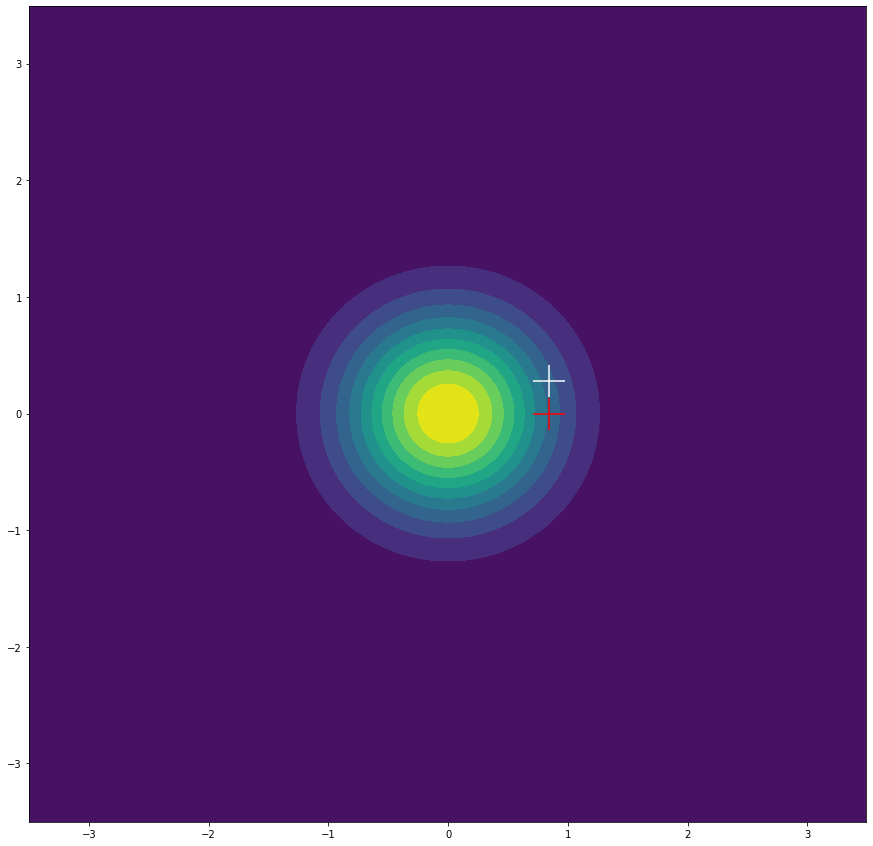

In [395]:
x_lim = 3 + .5
y_lim = 3 + .5
w_x, w_y = np.mgrid[-x_lim:x_lim:.01, -y_lim:y_lim:.01]
pos = np.empty(w_x.shape + (WEIGHT_SIZE,))
pos[:, :, 0] = w_x
pos[:, :, 1] = w_y

fig = plt.figure(figsize=(15, 15))
plt.contourf(w_x, w_y, b_model.posterior.pdf(pos), 10)
plt.scatter(lr.intercept_, lr.coef_[0][0], marker='+', c='white', s=1000)
plt.scatter(lr.intercept_, lr.coef_[0][1], marker='+', c='red', s=1000)

Посэмплируем, но ничего хорошего естественно не получается

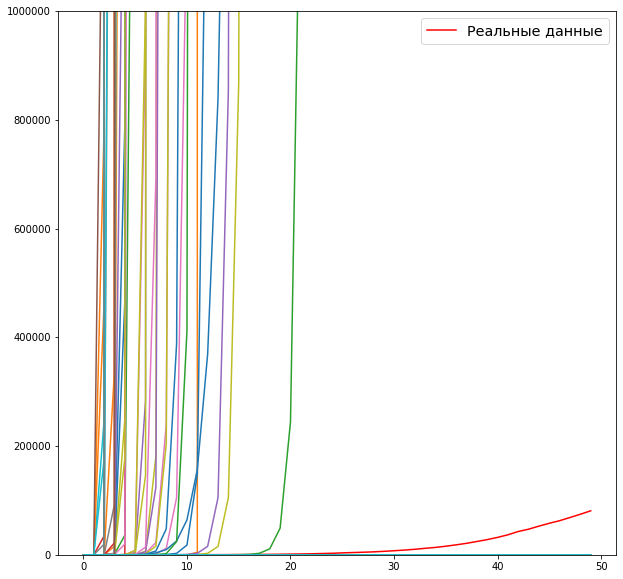

In [396]:
fig = plt.figure(figsize=(10, 10))
plt.ylim(top=1e6)
plt.plot(x_day, np.cumsum(np.exp(y_train.new_cases)), 'red', label="Реальные данные")

weights = b_model.posterior.rvs(50)

for weight in weights: 
    plt.plot(x_day, np.cumsum(np.exp(weight[0] + weight[1] * X_train + weight[2] * X_train ** 2)))
    
plt.legend(fontsize='x-large')    

Обучим нашу модель и опять посмотрим на распределение

In [397]:
X = np.array([x_day, x_day ** 2])
y = np.log(np.c_[rus_data_train.new_cases])
y = y.reshape(1, -1)

In [398]:
b_model.update_bayes(X, y)

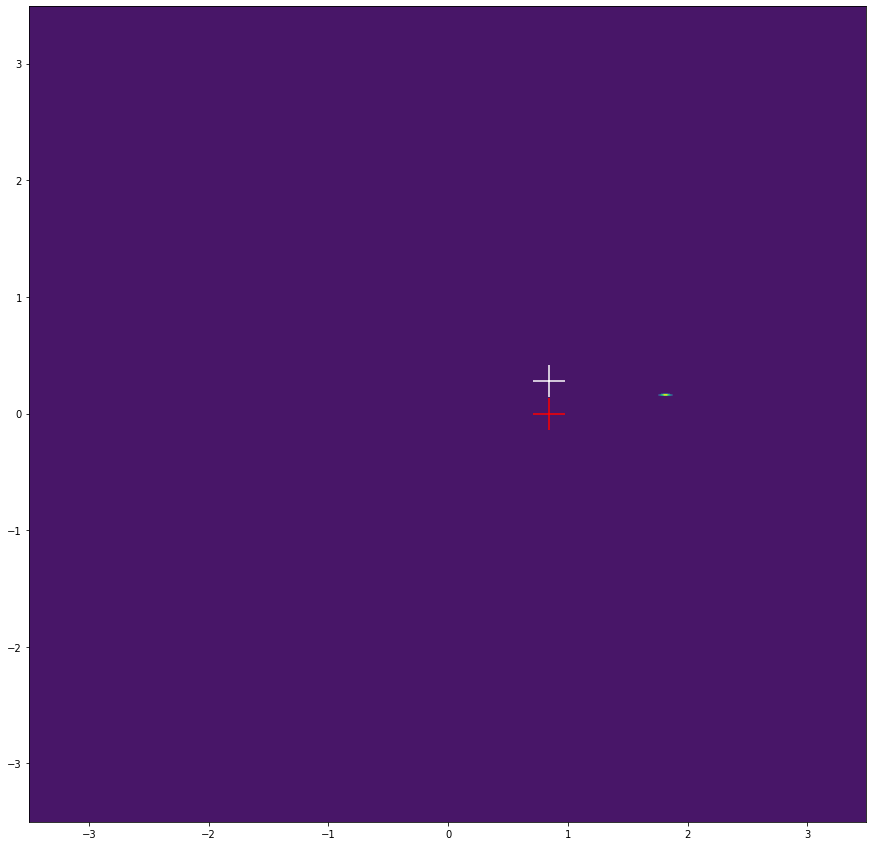

In [399]:
fig = plt.figure(figsize=(15, 15))
plt.contourf(w_x, w_y, b_model.posterior.pdf(pos), 10)
plt.scatter(lr.intercept_, lr.coef_[0][0], marker='+', c='white', s=1000)
plt.scatter(lr.intercept_, lr.coef_[0][1], marker='+', c='red', s=1000)

## 3c.	Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

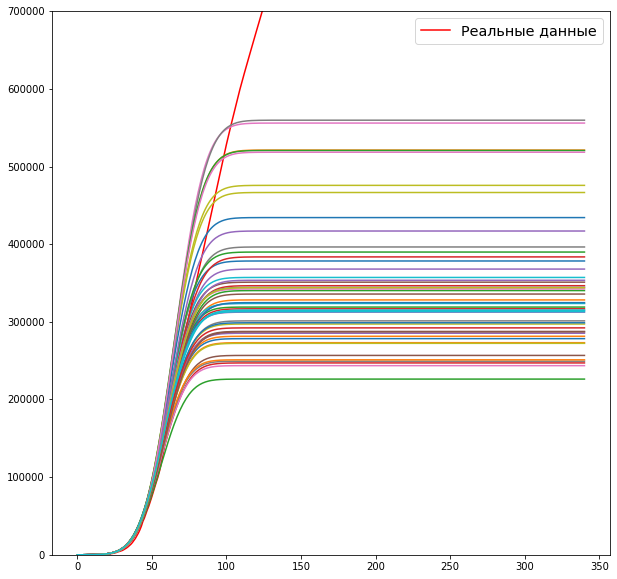

In [400]:
x_day_full = np.arange(len(rus_data.new_cases))
y_full = rus_data.new_cases

fig = plt.figure(figsize=(10, 10))
plt.ylim(top=7e5)
plt.plot(x_day_full, np.cumsum(y_full), 'red', label="Реальные данные")

weights = b_model.posterior.rvs(50)


for weight in weights:
    plt.plot(x_day_full, np.cumsum(np.exp(weight[0] + weight[1] * x_day_full + weight[2] * (x_day_full ** 2))))
    
plt.legend(fontsize='x-large')       

Посмотрим на прогнозы в пессимистичном и оптимистичном сценариях. Для предсказания не берем первые 50 дней.

In [401]:
y_pred = list()
weights = b_model.posterior.rvs(50)
x_day_full += 50

for weight in weights:
    y_pred.append(np.cumsum(np.exp(weight[0] + weight[1] * x_day_full + weight[2] * (x_day_full ** 2))))

In [402]:
print('Прогноз случаев заражения коронавирусом')
print('90% перцентиль:', np.percentile(np.array(y_pred), 90).astype(int))
print('10% перцентиль:', np.percentile(np.array(y_pred), 10).astype(int))

Прогноз случаев заражения коронавирусом
90% перцентиль: 374847
10% перцентиль: 164215


## 4.	Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

Попробуем рассчитать тоже самое для остальных стран из датасета. Для каждой страны в качестве начала эпидемии найдем момент времени, когда 3 дня будет фиксироваться больше 10 заражений. Обучающую выборку возьмем также 50 дней.

In [406]:
def some_predictions(start_data, end_date, location):

    result[result.new_cases <= 0] = 1
    data = result[result.location == location]
    data = data.fillna(0)
    data_train = data[(data.timestamp >= start_date) & (data.timestamp <= end_date)]
    data_test = data[data.timestamp > end_date]

    WEIGHT_SIZE = 3
    alpha = 3.
    mean = np.zeros(WEIGHT_SIZE)
    cov = 1/alpha*np.identity(WEIGHT_SIZE)

    noise_sigma = 0.2
    beta = 1 / noise_sigma ** 2

    b_model = Bayes(mean, cov, beta, WEIGHT_SIZE)

    x_day = np.arange(len(data_train.total_cases))

    X = np.array([x_day, x_day ** 2])
    y = np.log(np.c_[data_train.new_cases])
    y = y.reshape(1, -1)

    b_model.update_bayes(X, y)

    x_day_full = np.arange(len(data.new_cases))
    y_full = data.new_cases


    weights = b_model.posterior.rvs(10)

    for weight in weights:
        pass
    
    return [weight[0], weight[1], weight[2]]

In [407]:
SEC_BY_DAY = 86400

locations = list(set(result.location))
some_results = list()
locs = list()

for loc_ in locations:

    result = result.fillna(1)
    data = result[result.location == loc_]

    steps = 0
    for i, j in zip(data.new_cases, data.timestamp):
        if i > 10:
            steps += 1
        if steps > 3:
            start_date = j
            end_date = start_date + SEC_BY_DAY * 50
            break

    locs.append(loc_)
    some_results.append(some_predictions(start_date, end_date, loc_)) 

Попробуем покластеризовать полученные результаты по весам распределений. Визуально кажется, что большой разброс есть только у свободного веса w_0. Попробуем разделить наши страны на 3 группы, в которых свободный вес из распределения меньше 1, меньше 2 и больше 3.

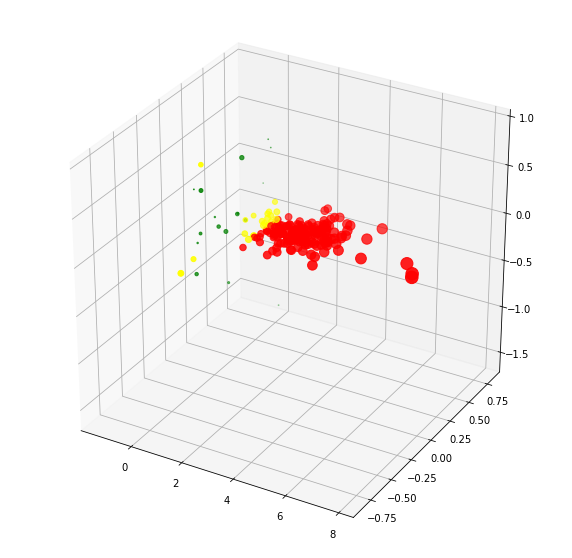

In [410]:
from mpl_toolkits.mplot3d import Axes3D

        
x = list()
y = list()
z = list()
size = list()
c = list()
green_loc = list()
yellow_loc = list()
red_loc = list()

for i in range(len(some_results)):
    x.append(some_results[i][0])
    y.append(some_results[i][1])
    z.append(some_results[i][2])
    size.append(some_results[i][0] * 20)
    
    if some_results[i][0] < 1:
        green_loc.append(locs[i])
        c.append('green')
    elif some_results[i][0] < 2:
        yellow_loc.append(locs[i])
        c.append('yellow')
    else:
        red_loc.append(locs[i])
        c.append('red')
    
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=size, color=c)

Посмотрим на страны с весом меньше 1. Там встречается интересный регион с названием 1, в остальном все страны имеют очень маленькую территорию - вот это совпадение!

In [411]:
print('Страны из зеленой зоны со свободным весом распределения < 1:')
print(*green_loc, sep='\n')

Страны из зеленой зоны со свободным весом распределения < 1:
1
Northern Cyprus
Timor
Hong Kong
Vatican
Fiji
Syria
Saint Helena
Samoa
Vanuatu
Faeroe Islands
Isle of Man
Saint Kitts and Nevis
Micronesia (country)
Laos
Greenland
Marshall Islands
Guernsey
Cayman Islands
Jersey
Grenada
Gibraltar
Bermuda


Теперь попробуем кластеризовать методом k-средних, чтобы учесть и остальные веса.

In [412]:
from sklearn.cluster import KMeans

coef = np.array(some_results)
X = pd.DataFrame(np.c_[coef[:,:1], coef[:,1:-1], coef[:,2:]])
y = pd.DataFrame(np.c_[np.array(locs)])

model = KMeans(n_clusters=3)

predicted_label = model.fit_predict(X)
predicted_label

array([1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0,
       2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0,
       0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 1, 0, 1])

По меткам кажется, что самый малочисленный класс 1, посмотрим, что там за страны. Получили похожие результаты, хотя в группу попали еще несколько небольших стран

In [416]:
for i in range(len(locs)):
    if predicted_label[i] == 1:
        print(locs[i])

1
Eritrea
Brunei
Northern Cyprus
Timor
Hong Kong
Vatican
Fiji
Syria
Saint Helena
Samoa
Vanuatu
Solomon Islands
Faeroe Islands
Isle of Man
Saint Kitts and Nevis
Micronesia (country)
Eswatini
Ghana
Laos
Greenland
Marshall Islands
Guernsey
Cayman Islands
Jersey
Grenada
Sri Lanka
Gibraltar
Bermuda


Можно сделать вывод, что кластеризация по параметрам распределения имеет право на жизнь.

## 5. Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?

В целом, домашнее задание было очень полезным для понимания Байесовской линейной регрессии.